In [163]:
import numpy as np
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import math
import scipy
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq, kmeans, whiten
from scipy.misc import logsumexp

In [50]:
dfcount = pd.read_table("docword.nips.txt", delimiter='\s+' ,header= None, skiprows=3)
dfword = pd.read_table("vocab.nips.txt", delimiter='\s+' ,header= None)

In [70]:
D = 1500
W = 12419
N = 746316
n_blob = 30

In [156]:
dfcount

(746316, 3)

In [52]:
dfcluster = np.zeros((D,W))
#put the data into dataframe that is each doc X word get one cell

In [53]:
for row in dfcount.iterrows():
    dfcluster[row[1][0]-1][row[1][1]-1] = row[1][2]


In [157]:
dfcluster.shape

(1500, 12419)

In [54]:
print(dfcluster)

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  2. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [66]:
dfcluster.shape

(1500, 12419)

using k-mean package for  initializing
https://piazza.com/class/jchzguhsowz6n9?cid=982

In [63]:
whitened = whiten(dfcluster)
codebook, distortion = kmeans(dfcluster, 30)
#doing k means clustering for initialing the probibleity of per cluster get words center, but some get zeros and later on have to do deviation so this cell is not using now

C:\Users\titus\Anaconda3\lib\site-packages\scipy\cluster\vq.py:148: RuntimeWarning: Some columns have standard deviation zero. The values of these columns will not change.
  RuntimeWarning)


In [64]:
print(codebook)

[[ 0.          0.07142857  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.02857143 ...,  0.01428571  0.02142857  0.        ]
 [ 0.          0.          0.04166667 ...,  0.          0.          0.625     ]
 ..., 
 [ 0.          0.          0.08571429 ...,  0.          0.          0.        ]
 [ 0.          0.02409639  0.02409639 ...,  0.01204819  0.01204819  0.        ]
 [ 0.          0.          0.03030303 ...,  0.          0.01515152  0.        ]]


In [65]:
codebook.shape

(30, 12419)

In [69]:
type(codebook)

numpy.ndarray

In [71]:
blob_centers = codebook

In [166]:
blob_centers.shape

(30, 12419)

In [182]:
p = np.zeros((n_blob, W))
for i in range(n_blob):
    s = np.random.uniform(0,1,W)
    p[i,:] = s/sum(s) #over all word probibleity inside one cluster  has to sum to 1 (which is one row)
#instead we use random uniform distributio initialing the probibleity of each cluster for each words center

In [ ]:
#p = np.zeros((n_blob, W))
#for i in range(n_blob):
#    for k in range(k)
#          p[i,:] = blob_centers[i,k]/sum(blob_centers[i,:])


In [183]:
p

array([[  6.00658801e-05,   1.31311551e-04,   9.17515073e-05, ...,
          3.47476130e-05,   9.79231814e-05,   1.59623721e-05],
       [  7.60553225e-05,   1.27003591e-04,   1.20547459e-04, ...,
          3.60920939e-05,   1.50707945e-04,   1.50687954e-04],
       [  7.08335754e-05,   6.77983496e-06,   1.01395161e-04, ...,
          7.40929575e-05,   1.07912358e-04,   1.35082913e-04],
       ..., 
       [  5.88187391e-05,   1.51951136e-04,   1.04252273e-04, ...,
          5.05462373e-05,   1.33602460e-04,   1.58492521e-04],
       [  1.26167469e-05,   1.31692986e-04,   1.61181700e-04, ...,
          1.26129720e-05,   1.27608725e-04,   4.31565592e-05],
       [  1.55560770e-04,   2.14772672e-05,   1.10299724e-05, ...,
          9.60929225e-05,   1.33380159e-04,   6.43000687e-05]])

In [170]:
p.shape

(30, 12419)

In [243]:
# e-step

#in the equation, the most inside sum you see where the summing over k
k_sum = np.dot(dfcluster,np.transpose(np.log(p)))

In [165]:
k_sum 

array([[-14846.15702753, -14980.25470641, -15338.07647462, ...,
        -15000.79267027, -15000.96943329, -15092.1639651 ],
       [-13550.44698209, -13380.36346819, -13206.87301422, ...,
        -13234.83274601, -13282.64638033, -13258.2423403 ],
       [-13944.25970954, -13716.17109341, -13489.58532332, ...,
        -13632.90718647, -13567.68094281, -13716.36326131],
       ..., 
       [-11539.17297578, -11690.97025811, -11399.70751739, ...,
        -11646.70643195, -11373.7055907 , -11466.56925595],
       [-14450.84537711, -14421.9901263 , -14555.15993543, ...,
        -14600.97402819, -14560.7890071 , -14717.41899698],
       [ -4105.53649073,  -4121.88043174,  -4173.70966476, ...,
         -4120.60083554,  -4111.02761282,  -4146.75948913]])

In [107]:
#in the equation, the most inside sum you see where the summing over ij


ij_sum =  np.zeros((D, n_blob))
for i in range(n_blob):
    ij_sum[:,i] = k_sum[:, i]+ np.log(pi[i])


In [111]:
ij_sum.shape

(1500, 30)

In [121]:
ij_sum

array([[-14849.55822491, -14983.65590379, -15341.477672  , ...,
        -15004.19386766, -15004.37063067, -15095.56516248],
       [-13553.84817948, -13383.76466557, -13210.2742116 , ...,
        -13238.23394339, -13286.04757772, -13261.64353768],
       [-13947.66090692, -13719.57229079, -13492.9865207 , ...,
        -13636.30838385, -13571.08214019, -13719.76445869],
       ..., 
       [-11542.57417316, -11694.3714555 , -11403.10871477, ...,
        -11650.10762933, -11377.10678808, -11469.97045333],
       [-14454.2465745 , -14425.39132368, -14558.56113281, ...,
        -14604.37522557, -14564.19020448, -14720.82019436],
       [ -4108.93768812,  -4125.28162913,  -4177.11086214, ...,
         -4124.00203293,  -4114.4288102 ,  -4150.16068652]])

In [109]:
#after this cell is getting w_ij

w_ij =  np.zeros((D, n_blob))


In [122]:
maxrow = np.max(ij_sum, axis=1, keepdims=True)

In [125]:
temp_ij_sum = ij_sum

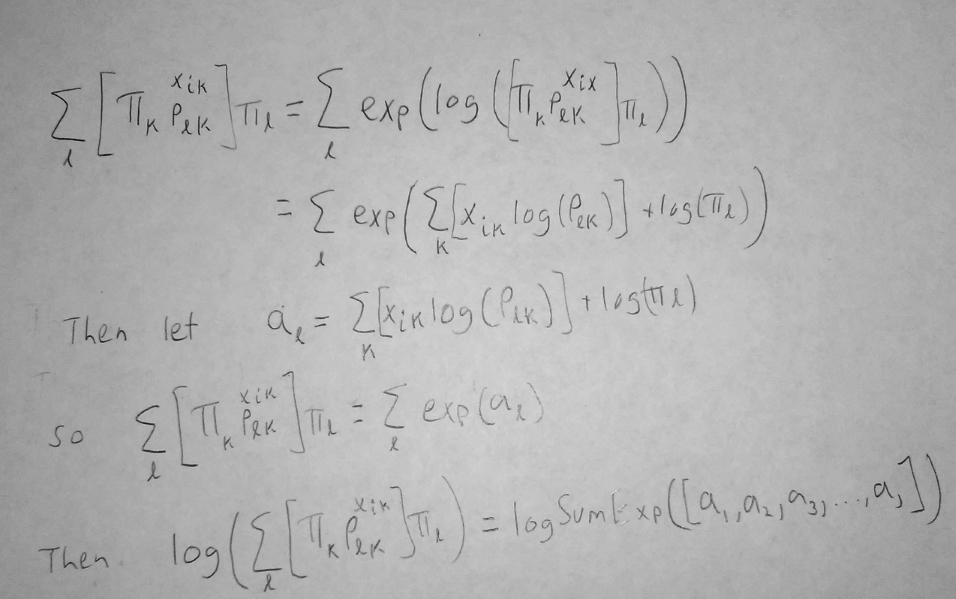

In [253]:
from IPython.core.display import Image, display
display(Image('20180330_154755.jpg', unconfined=True))


In [204]:
for i in range(D):
    log_wij[i] = logsumexp(temp_ij_sum[i,]-maxrow[i])

In [206]:
maxrow.shape

(1500, 1)

### log(wij)=log(numerator)−log(denominator)=log(αj)−logSumExp([α1,⋯,αn]).

In [211]:
for i in range(n_blob):
    w_ij[:,i] = ij_sum[:,i]-maxrow.flatten()-log_wij.flatten()

In [212]:
w_ij = np.exp(w_ij)

In [223]:
new_mus = np.zeros((n_blob,W))
new_pies = np.zeros((n_blob))

In [235]:
#M Step
for i in range(n_blob):
        new_mus[i,:] =  np.sum(dfcluster*w_ij[:,i].reshape(D,1), axis=0)/np.sum(np.sum(dfcluster)*w_ij[:,i])
        new_pies[i] = np.sum(w_ij[:,i])/D
#get the new mus and pie

In [237]:
new_mus.shape

(30, 12419)

In [241]:
np.sum(dfcluster*w_ij[:,i,np.newaxis], axis=0)

array([  2.60386324e-076,   3.63757977e-010,   4.81985681e-011, ...,
         4.01778601e-026,   9.02527007e-061,   5.26888344e-187])

In [242]:
np.sum(dfcluster*w_ij[:,i].reshape(D,1), axis=0)

array([  2.60386324e-076,   3.63757977e-010,   4.81985681e-011, ...,
         4.01778601e-026,   9.02527007e-061,   5.26888344e-187])

In [244]:
Q = w_ij * ij_sum

In [245]:
Q

array([[ -4.34667655e+000,  -2.53617729e-058,  -1.03373584e-213, ...,
         -3.05668093e-067,  -2.56146262e-067,  -6.39495762e-107],
       [ -3.40992059e-176,  -2.47509283e-102,  -5.41840986e-027, ...,
         -3.90870452e-039,  -6.73598400e-060,  -2.66773396e-049],
       [ -4.80755635e-194,  -5.39996500e-095,  -1.34929865e+004, ...,
         -7.77682830e-059,  -1.64481809e-030,  -4.45594240e-095],
       ..., 
       [ -2.91144815e-091,  -3.50801294e-157,  -1.06637179e-030, ...,
         -5.84722346e-138,  -2.08646209e-019,  -9.83475565e-060],
       [ -1.07530410e-064,  -3.65039323e-052,  -5.38787162e-110, ...,
         -6.85447325e-130,  -1.93602232e-112,  -1.85359872e-180],
       [ -8.98776085e-005,  -7.19933135e-012,  -2.25717203e-034, ...,
         -2.58749190e-011,  -3.71079945e-007,  -1.13518366e-022]])